In [16]:
import matplotlib 
from matplotlib import pyplot as plt

# Load MNIST data and encode labels

In [2]:
# An MNIST loader.

import numpy as np
import gzip
import struct


def load_images(filename):
    # Open and unzip the file of images:
    with gzip.open(filename, 'rb') as f:
        # Read the header information into a bunch of variables:
        _ignored, n_images, columns, rows = struct.unpack('>IIII', f.read(16))
        # Read all the pixels into a NumPy array of bytes:
        all_pixels = np.frombuffer(f.read(), dtype=np.uint8)
        # Reshape the pixels into a matrix where each line is an image:
        return all_pixels.reshape(n_images, columns * rows)


def prepend_bias(X):
    # Insert a column of 1s in the position 0 of X.
    # (“axis=1” stands for: “insert a column, not a row”)
    return np.insert(X, 0, 1, axis=1)


# 60000 images, each 785 elements (1 bias + 28 * 28 pixels)
X_train = prepend_bias(load_images("../data/mnist/train-images-idx3-ubyte.gz"))

# 10000 images, each 785 elements, with the same structure as X_train
X_test = prepend_bias(load_images("../data/mnist/t10k-images-idx3-ubyte.gz"))


def load_labels(filename):
    # Open and unzip the file of images:
    with gzip.open(filename, 'rb') as f:
        # Skip the header bytes:
        f.read(8)
        # Read all the labels into a list:
        all_labels = f.read()
        # Reshape the list of labels into a one-column matrix:
        return np.frombuffer(all_labels, dtype=np.uint8).reshape(-1, 1)


def one_hot_encode(Y):
    n_labels = Y.shape[0]
    n_classes = 10
    encoded_Y = np.zeros((n_labels, n_classes))
    for i in range(n_labels):
        label = Y[i]
        encoded_Y[i][label] = 1
    return encoded_Y


# 60K labels, each a single digit from 0 to 9
Y_train_unencoded = load_labels("../data/mnist/train-labels-idx1-ubyte.gz")

# 60K labels, each consisting of 10 one-hot encoded elements
Y_train = one_hot_encode(Y_train_unencoded)

# 10000 labels, each a single digit from 0 to 9
Y_test = load_labels("../data/mnist/t10k-labels-idx1-ubyte.gz")

In [12]:
data.Y_train_unencoded

NameError: name 'data' is not defined

In [10]:
# display the first five examples of encoded labels
# each row is one example 
# the column index with the 1 corresponds to the label 
# example 1 has the 1 one column 5, hece the label is '5' (the picture represens a handwritten five)
Y_train[0:5,:]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

# Function for machine learning

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward(X, w):
    """
    X*w -> elementwise sigmoid function
    
    parameters:
    -----------
    X: matrix, num_examples -by- num_variables
    w: matrix, num_variables -by- num_classes
    
    returns:
    --------
    matrix, num_examples -by- num_classes
    """
    weighted_sum = np.matmul(X, w)
    return sigmoid(weighted_sum)

def classify(X, w):
    y_hat = forward(X, w)
    labels = np.argmax(y_hat, axis=1)
    return labels.reshape(-1, 1)

def loss(X, Y, w):
    y = forward(X, w)
    return -np.sum( Y*np.log(y) + (1-Y)*np.log(1-y))

def gradient(X, Y, w):
    return np.matmul(X.T, (forward(X, w)-Y)) / X.shape[0]

def report(iteration, X_train, Y_train, X_test, Y_test, w):
    matches = np.count_nonzero(classify(X_test, w) == Y_test)
    n_test_ex = Y_test.shape[0]
    matches = matches * 100.0 / n_test_ex
    training_loss = loss(X_train, Y_train, w)
    print('iteration {} - loss: {:.2f}, matches: {:.2f}%'.format(iteration, training_loss, matches))

def train(X_train, Y_train, X_test, Y_test, iterations, lr):
    w = np.zeros((X_train.shape[1], Y_train.shape[1]))
    for i in range(iterations):
        report(i, X_train, Y_train, X_test, Y_test, w)
        w -= gradient(X_train, Y_train, w) * lr
    #report(i, X_train, Y_train, X_test, Y_test, w)
    return w

# Apply the code

In [57]:
w = train(X_train, Y_train, X_test, Y_test, iterations=10, lr=1e-5)

iteration 0 - loss: 415888.31, matches: 9.80%
iteration 1 - loss: 506067.41, matches: 68.04%
iteration 2 - loss: 330722.85, matches: 68.10%
iteration 3 - loss: 177412.20, matches: 68.62%
iteration 4 - loss: 113912.33, matches: 73.75%
iteration 5 - loss: 105349.73, matches: 81.99%
iteration 6 - loss: 100492.88, matches: 81.25%
iteration 7 - loss: 97432.51, matches: 82.89%
iteration 8 - loss: 93916.83, matches: 82.69%
iteration 9 - loss: 91756.16, matches: 83.61%


## check some examples

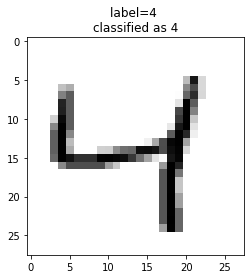

In [50]:
def plot_ex(ex_ind):
    plt.imshow(255 - X_train[ex_ind, 1:].reshape(28,28), cmap = 'gray')
    classification = classify(X_train[ex_ind:ex_ind+1], w)[0,0]
    plt.title('label={} \nclassified as {}'.format(Y_train_unencoded[ex_ind,0], classification))
    
ex_ind = 2 # which example
plot_ex(ex_ind)

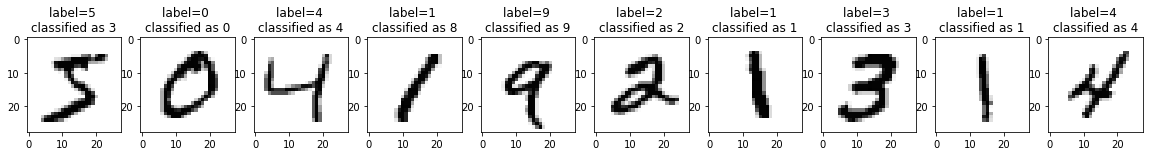

In [51]:
# show many examples
plt.figure(figsize=(20, 3))
for i in range(10):
    plt.subplot(1,10,i+1)
    plot_ex(i)


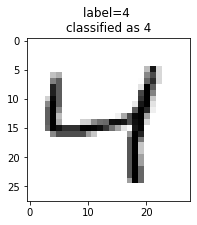

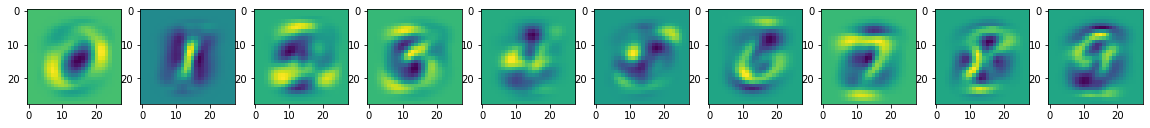

In [58]:
# for one example show the weights for all classes as well

plt.figure(figsize=(3, 3))
plot_ex(ex_ind)

plt.figure(figsize=(20, 3))
for i in range(10):
    ww = w[1:,i].reshape(28, 28)
    plt.subplot(1,10,i+1)
    plt.imshow(ww)

Explain, why the weight matrixes look the way they do